# Bootstrap Aggregating (Classification)

In [1]:
import pandas as pd

In [6]:
df = pd.read_excel("Raisin_Dataset.xlsx")
df.sample(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
308,67093,353.109872,243.001034,0.725546,68383,0.760692,972.971,Kecimen
633,54357,362.594718,192.949367,0.846659,56006,0.699918,945.828,Besni
387,65091,392.493271,216.827572,0.833555,69597,0.664194,1079.752,Kecimen
772,66265,424.559435,203.381292,0.877793,70487,0.628015,1126.765,Besni
673,99177,494.055192,260.973648,0.849103,104468,0.614175,1317.687,Besni


In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop(columns=['Class'])

In [10]:
y = df['Class']

In [43]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# Let's Try SVM first

In [12]:
from sklearn.svm import SVC

In [13]:
model = SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC()

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report

In [16]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       Besni       0.88      0.79      0.83        86
     Kecimen       0.83      0.90      0.86        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76        19
           1       0.77      0.81      0.79        21

    accuracy                           0.78        40
   macro avg       0.78      0.77      0.77        40
weighted avg       0.78      0.78      0.77        40


--- Visualizing Classification ---


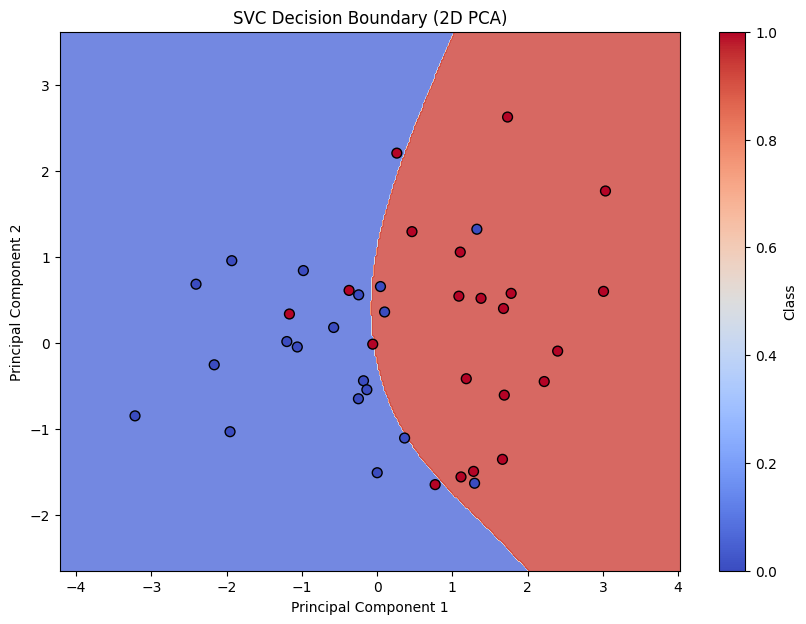

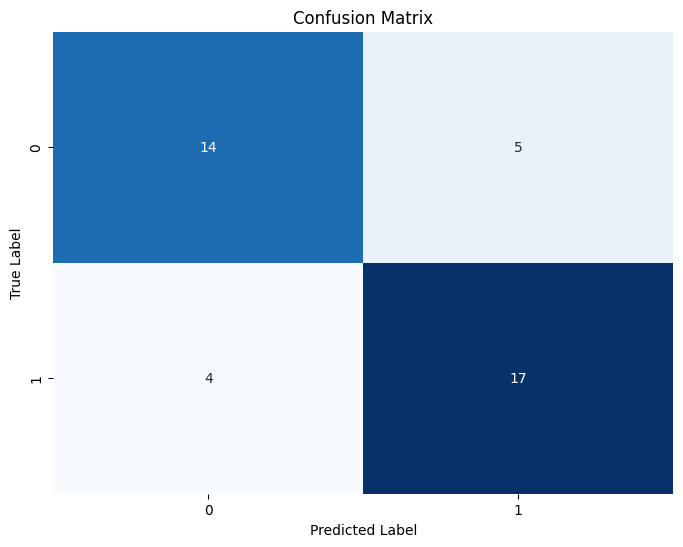

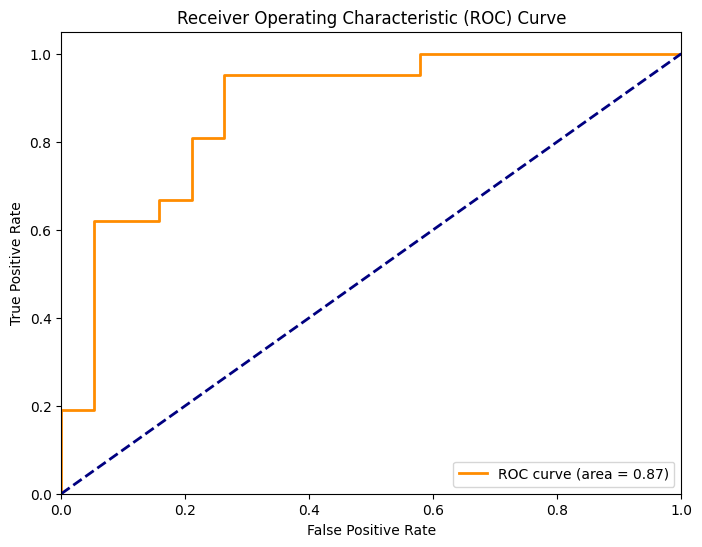

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA # For dimensionality reduction

# 1. Re-create the dummy dataset and train the model (as in your previous code)
X, y = make_classification(n_samples=200, n_features=4, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel="rbf", probability=True) # Set probability=True for ROC curve
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

print("\n--- Visualizing Classification ---")

# --- 1. Decision Boundary Plot (requires 2 features) ---
# Reduce dimensions to 2 for plotting
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a new SVC model on the 2D PCA-transformed data for visualization
# It's important to train the model on the reduced data for the boundary to be accurate
model_2d = SVC(kernel="rbf", random_state=42)
model_2d.fit(X_train_pca, y_train)

# Create a meshgrid to plot the decision boundary
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the meshgrid
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm) # Decision regions
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=50, edgecolors='k') # Test data points
plt.title('SVC Decision Boundary (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

# --- 2. Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# --- 3. ROC Curve and AUC (for binary classification) ---
if len(model.classes_) == 2: # Check if it's a binary classification
    y_prob = model.predict_proba(X_test)[:, 1] # Probability of the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("\nROC Curve is primarily for binary classification. Skipping for multi-class.")

# Wisdom of Crowed 

In [22]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Bootstrap Aggretation 

In [37]:
log_model =LogisticRegression()
dt_model = DecisionTreeClassifier()
svc_model = SVC(probability=True)

In [49]:
vc = VotingClassifier(estimators =[
    ('lr',log_model),
    ('svc',svc_model),
    ('dt',dt_model)    
],voting='hard')
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svc', SVC(probability=True)),
                             ('dt', DecisionTreeClassifier())])

In [50]:
y_pred = vc.predict(X_test)

In [51]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.83      0.90      0.86        21

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40

